
#   Investor Presence In The Caviar Criminal Network


###  Data analysis in support of heftier consequences for investor involvement in criminal activity.

I have chosen to look at the role of the investors in the CAVIAR criminal network. Often the “War on Drugs” is one performed on the street level, penalizing low level players who physically commit crimes. These vulnerable people pay a large price engaging in risky behavior for little reward often because they are already in adverse financial situations. These lower level individuals are many and often easily replaceable in criminal networks.

I propose instead authorities should focus on the prosecution of and larger penalties for some of the most centrally connected and active figures in crime organizations, the investors.

The CAVIAR investigation lasted two years and ran from 1994 to 1996. The operation brought together investigation units of the Montréal police and the Royal Canadian Mounted Police of Canada. During this two year period, 11 wiretap warrants, valid for a period of about two months each, were obtained (the 11 matrices contained in phase1.csv, phase2.csv, correspond to these eleven, two month wiretap phases).

This case is interesting because, unlike other investigative strategies, the mandate of the CAVIAR project was to seize the drugs without arresting the perpetrators. During this period, imports of the trafficking network were hit by the police on eleven occasions. The arrests took place only at the end of the investigation. Monetary losses for traffickers were estimated at million dollars. Eleven seizures took place throughout the investigation. Some phases included no seizures, and others included multiple.


From police data in the CAVIAR network I have identified five central investors:
*   Alain (n83) and Gérard (n86) Levy : Investors and transporters of money.
*   Antonio Iannacci (n89): Investor.
*   Mohammed Echouafni (n84): Moroccan investor.
*   Patrick Lee (n87): Investor.

Using this information I have been able to perform time series analysis, centrality analysis, and analysis on the connectivity of this data to determine the extent of the role of the investors in the network. I find the their role is continuous and central.


From my analysis follows recomendations for heavier enforcement and stricter penalties for those involved in the investments crimes.

In [ ]:
#load data for caviar network, create a Digraph for each phase
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import statistics as stats
from statistics import mean

!apt-get install graphviz graphviz-dev
!pip install pygraphviz

phases = {}
G = {}
dG = {}
for i in range(1,12):
  var_name = "phase" + str(i)
  file_name = "https://raw.githubusercontent.com/ragini30/Networks-Homework/main/" + var_name + ".csv"
  phases[i] = pd.read_csv(file_name, index_col = ["players"])
  phases[i].columns = "n" + phases[i].columns
  phases[i].index = phases[i].columns
  phases[i][phases[i] > 0] = 1
  G[i] = nx.from_pandas_adjacency(phases[i])
  G[i].name = var_name
  dG[i] = nx.from_pandas_adjacency(phases[i], create_using = nx.DiGraph())
  dG[i].name = var_name

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libgraphviz-dev' instead of 'graphviz-dev'
graphviz is already the newest version (2.42.2-6).
libgraphviz-dev is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


In [ ]:
# a function to compare network metrics betweeen groups
def network_metric_statistics(metric_data):
    avg = stats.mean(metric_data)
    med = stats.median(metric_data)
    std = stats.stdev(metric_data)

    return("Here is a quick summary of your data: average = " + '{:.5f}'.format(avg) + ", median = " + '{:.5f}'.format(med) + ", standard deviation = " + '{:.5f}'.format(std))



### Lets look at how many phases out of the 11 the investors were present in.



In [ ]:
# what level of involvement did investors have in each phase?
investors = ['n83', 'n86', 'n89', 'n84', 'n87']
investor_phases = dict.fromkeys(investors, 0)

for i in range(1, 12):
  for invest in investors:
    if invest in G[i].nodes:
        investor_phases[invest] = investor_phases[invest] +1

for k in investor_phases:
    investor_phases[k] = investor_phases[k]/11
print(investor_phases)

{'n83': 1.0, 'n86': 0.6363636363636364, 'n89': 0.5454545454545454, 'n84': 0.6363636363636364, 'n87': 0.5454545454545454}



Over the course of 11 phases of the investigation many actors came in and out of the phone-tapped network. In fact the mean percentage of involvement of all phases for a non-investor was just 29%. In contrast the investor group was involved in 67% of the phases. When you think about it this figure is not that surprising. An investor is deeply tied to the network by the investment itself. Even when the operation switched countries and products the investors were still present. In fact, almost everything could change about the network and the investors would still likely be involved.  


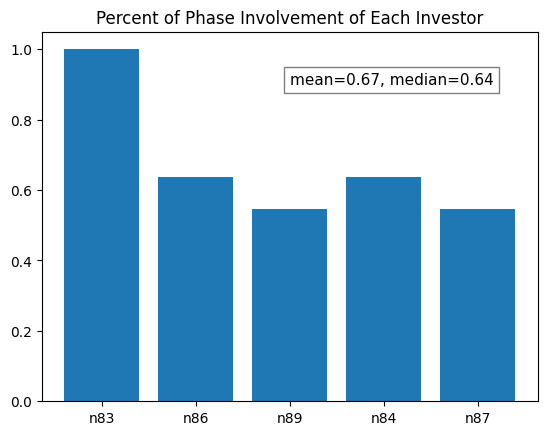

'Here is a quick summary of your data: average = 0.67273, median = 0.63636, standard deviation = 0.18851'

In [ ]:
#plot percent involvment for each investor over the 11 phases
names = list(investor_phases.keys())
values = list(investor_phases.values())

plt.bar(range(len(investor_phases)), values, tick_label=names)
plt.text(2, .9, f'mean={round(mean(values), 2)}, median={round(stats.median(values), 2)}' , fontsize=11, bbox=dict(facecolor='white', alpha=0.5))
plt.title("Percent of Phase Involvement of Each Investor")
plt.show()
network_metric_statistics(values)

In [ ]:
#make a structure to hold stats for all non investors

central_set = set()
central_set.clear()

for i in range(1,12):
  central_set = central_set.union(G[i].nodes)
  central_set = central_set.difference(investors)

central_list = list(central_set)
central_dict = dict.fromkeys(central_list, 0)

for i in range(1, 12):
  for person in central_dict:
    if person in G[i].nodes:
        central_dict[person] = central_dict[person] +1

for k in central_dict:
    central_dict[k] = central_dict[k]/11


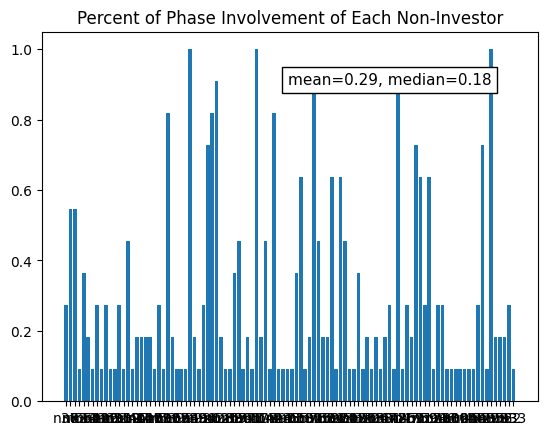

'Here is a quick summary of your data: average = 0.28699, median = 0.18182, standard deviation = 0.25990'

In [ ]:

#plot percent involvment for each investor over the 11 phases
names = list(central_dict.keys())
values = list(central_dict.values())

plt.bar(range(len(central_dict)), values, tick_label=names )

plt.title("Percent of Phase Involvement of Each Non-Investor")
plt.text(50, .9, f'mean={round(mean(values), 2)}, median={round(stats.median(values), 2)}' , fontsize=11, bbox=dict(facecolor='white', alpha=1))
plt.show()
network_metric_statistics(values)

#now lets look at centrality measures
How central are these investors to the network?


The next question I pose about investor presence is just how central are they are the network. Intuitively one would imagine that for an investor involved in criminal activity it would be optimal to distance themselves from the network in order to minimize risk. That assumption is contrary to the data that I uncovered. I looked at four different centrality measures and found that the investors are always more central to the network than the average player and in fact they are often such by 300%.


[('n87', 0.06132692752337006), ('n89', 0.04794845425622871), ('n83', 0.031784565037010895), ('n86', 0.007043977200350133), ('n84', 6.109481915933529e-05)]


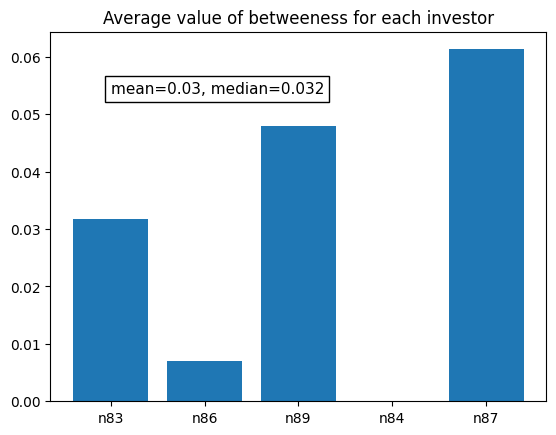

In [ ]:
'''
Central_plot a function that will compute a given centrality measure for each
individual in a given group for all 12 phases. Then is will use a bar plot to
visualize the metric and finally give some summary statistics for the computed
metric
'''
def central_plot(graph, group, metric, metric_name, title):
  centrality_measure=dict.fromkeys(group,0)

  for i in range(1,len(graph)+1):
    single_measure = metric(graph[i])

    for key in single_measure:
      if key in group:
        centrality_measure[key] = centrality_measure[key] + single_measure[key]


  for key in centrality_measure:
    centrality_measure[key] = centrality_measure[key]/len(graph)
  print(sorted(centrality_measure.items(), key=lambda x:x[1], reverse= True))

#plot average betweeness for each investor over the phases
  names = list(centrality_measure.keys())
  values = list(centrality_measure.values())

  plt.bar(range(len(centrality_measure)), values, tick_label=names )

  plt.title(f"Average value of {metric_name} for each {title}")
  plt.text( 0, max(values)*7/8 ,f'mean={round(mean(values), 3)}, median={round(stats.median(values), 3)}' , fontsize=11, bbox=dict(facecolor='white', alpha=1))
  plt.show()
  network_metric_statistics(values)

central_plot(G, investors, nx.betweenness_centrality,"betweeness", "investor")

[('n1', 0.655050992293228), ('n12', 0.16756212382251084), ('n3', 0.12940285961873224), ('n76', 0.08379132554240724), ('n41', 0.05036907536907536), ('n14', 0.03267098754903633), ('n82', 0.029196391038131618), ('n85', 0.023733070994913123), ('n79', 0.02194055944055944), ('n37', 0.015950783633710462), ('n88', 0.012435413517588706), ('n8', 0.009169798115377987), ('n7', 0.007977502295684115), ('n96', 0.007856316663134844), ('n9', 0.007481933389191453), ('n22', 0.006984478935698448), ('n31', 0.006964809384164223), ('n107', 0.005681818181818182), ('n13', 0.005681818181818182), ('n5', 0.005681818181818182), ('n2', 0.005117510669241589), ('n11', 0.005106777700095339), ('n58', 0.004312354312354313), ('n6', 0.00402930402930403), ('n71', 0.0032150776053215075), ('n78', 0.0023530762167125806), ('n27', 0.0021756021756021756), ('n30', 0.0018078512396694215), ('n19', 0.0010185892538833714), ('n49', 0.0006842619745845552), ('n20', 0.0005543237250554324), ('n73', 0.00044345898004434584), ('n24', 0.00033

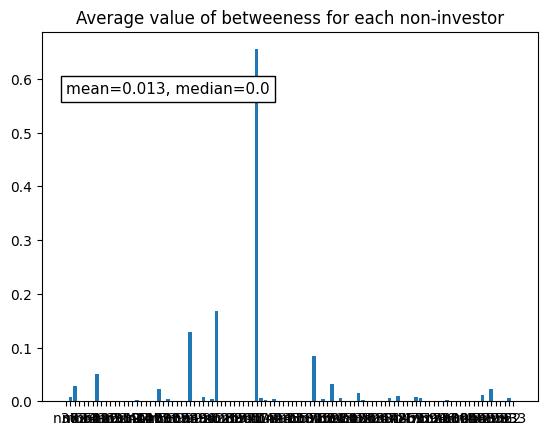

In [ ]:
central_plot(G, central_list, nx.betweenness_centrality, "betweeness", "non-investor")

[('n83', 0.09583553802511284), ('n87', 0.09026058937367142), ('n89', 0.059124468119750535), ('n84', 0.03816835210422937), ('n86', 0.035696096099364666)]


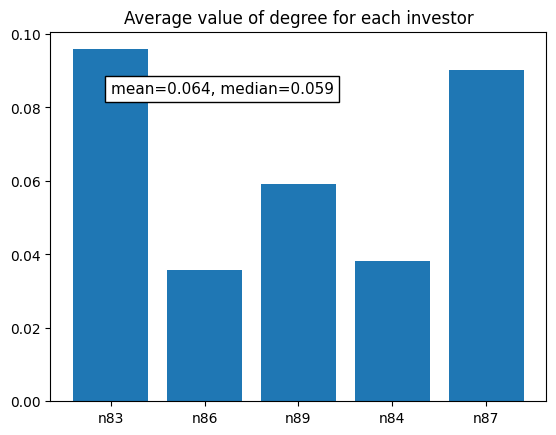

In [ ]:
central_plot(G, investors, nx.degree_centrality,"degree", "investor")

[('n1', 0.601485232986564), ('n3', 0.22350498365361704), ('n12', 0.17089306302153007), ('n85', 0.11801003549912395), ('n76', 0.11223526449967304), ('n8', 0.0744413041459421), ('n88', 0.06235027457136344), ('n9', 0.05682295311331846), ('n6', 0.05456875867508854), ('n2', 0.048554076072089655), ('n82', 0.0475699538284475), ('n11', 0.04606857112104918), ('n5', 0.037920818662403516), ('n37', 0.033963246657259964), ('n14', 0.03303536356474273), ('n19', 0.030463556899434162), ('n41', 0.02764395619162803), ('n7', 0.02741099612912057), ('n13', 0.027310261562103345), ('n4', 0.025636371889322326), ('n79', 0.024822904368358913), ('n90', 0.02456453296374245), ('n31', 0.023749436047823144), ('n17', 0.020761322696091312), ('n96', 0.019999328092454475), ('n49', 0.019886363636363636), ('n81', 0.019091533005058507), ('n15', 0.018860373497470273), ('n78', 0.01869097273753593), ('n18', 0.01848859542336404), ('n77', 0.017002509685436516), ('n20', 0.01662240198825565), ('n34', 0.01564636189931233), ('n64', 

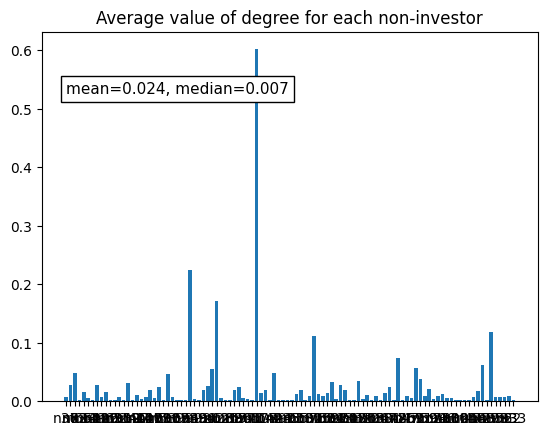

In [ ]:
central_plot(G, central_list, nx.degree_centrality,"degree", "non-investor")

[('n83', 0.15352180271841842), ('n87', 0.14108007414121285), ('n84', 0.08190166093507921), ('n89', 0.07835380827899846), ('n86', 0.05815382948587466)]


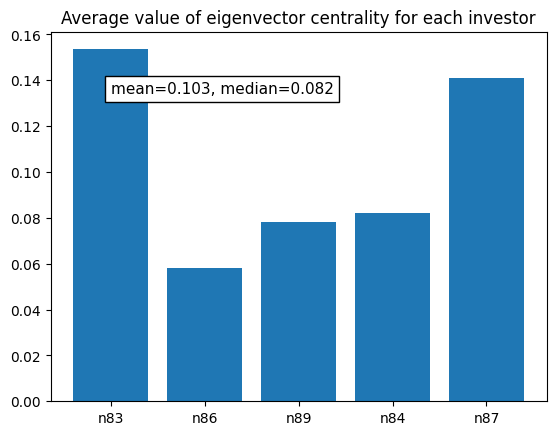

In [ ]:
central_plot(G, investors, nx.eigenvector_centrality,"eigenvector centrality", "investor")

[('n1', 0.5463910796025788), ('n3', 0.2980946631382842), ('n85', 0.1906118157991998), ('n76', 0.1658774444630568), ('n8', 0.15239397677796265), ('n12', 0.14189335589468527), ('n2', 0.1143017983857542), ('n9', 0.10068037663051316), ('n82', 0.10006653319969878), ('n6', 0.09733603139768351), ('n11', 0.09269035950804848), ('n88', 0.08638933030560703), ('n5', 0.08553047384744338), ('n37', 0.07099701233159753), ('n4', 0.07086969700825439), ('n41', 0.06386946987541972), ('n19', 0.06188276066890805), ('n90', 0.06167924444338147), ('n13', 0.05211172342676842), ('n81', 0.052033271139319284), ('n14', 0.05169733354544921), ('n15', 0.047777800029916835), ('n55', 0.04192306140306102), ('n77', 0.04058592846263485), ('n34', 0.04012817121053514), ('n27', 0.037109895072313465), ('n31', 0.035360799458782476), ('n47', 0.033911901822008185), ('n49', 0.0328886171071435), ('n64', 0.032471698715003224), ('n7', 0.03152333895009412), ('n20', 0.029473531133684627), ('n17', 0.029129125576417406), ('n52', 0.028760

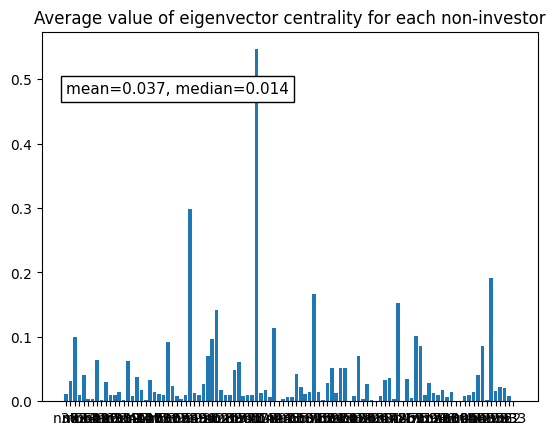

In [ ]:
central_plot(G, central_list, nx.eigenvector_centrality,"eigenvector centrality", "non-investor")

[('n83', 0.17668753925529634), ('n87', 0.12066292843236154), ('n89', 0.10000154422256369), ('n84', 0.09624398467758026), ('n86', 0.09191923567818662)]


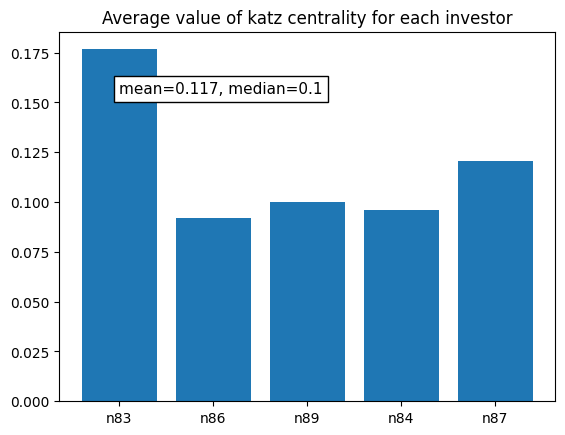

In [ ]:
central_plot(G, investors, nx.katz_centrality,"katz centrality", "investor")

[('n1', 0.4125389881771779), ('n3', 0.2519784402950011), ('n85', 0.1921697597322964), ('n12', 0.1832249202161779), ('n76', 0.17411094991333143), ('n8', 0.15987403406650838), ('n2', 0.13402583709169313), ('n6', 0.12797820865022966), ('n11', 0.12238439273844688), ('n9', 0.1179894973613863), ('n88', 0.11646561049365207), ('n5', 0.10427177227662619), ('n4', 0.10061996602030408), ('n82', 0.09646780758175243), ('n14', 0.09003922927950375), ('n13', 0.08315661329465457), ('n7', 0.07866660258163444), ('n17', 0.07673306341622155), ('n90', 0.07621770632127677), ('n18', 0.07498050102482558), ('n19', 0.0721909803895653), ('n81', 0.06518058611439476), ('n37', 0.0636151507303961), ('n15', 0.05540936429057137), ('n78', 0.054340779109802326), ('n16', 0.0532183546804154), ('n55', 0.05280004097557704), ('n41', 0.050288878206022014), ('n34', 0.050214750964897116), ('n31', 0.04313432706719225), ('n77', 0.04263360079854355), ('n96', 0.04193288398115389), ('n47', 0.04185379449683702), ('n79', 0.0407902746688

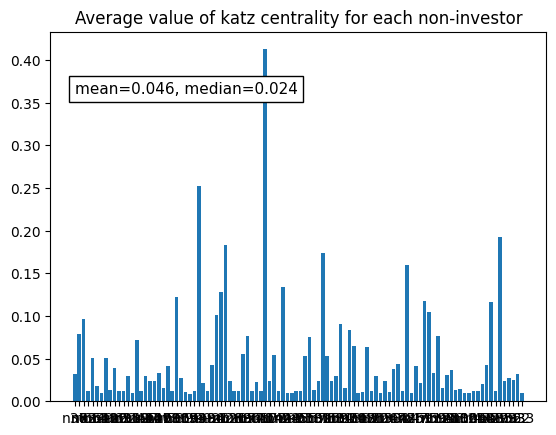

In [ ]:
central_plot(G, central_list, nx.katz_centrality,"katz centrality", "non-investor")

Now lets look at the networks for a visual analysis of where the investors are. Below are the ll phases, the investor nodes are blue while the non-investors are yellow.

In [ ]:
%matplotlib inline
def draw(G, pos, measures, measure_name):

    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma,
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    #labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

pos = {}
for i in range(1,12):
  pos[i]= nx.drawing.nx_agraph.graphviz_layout(G[i])


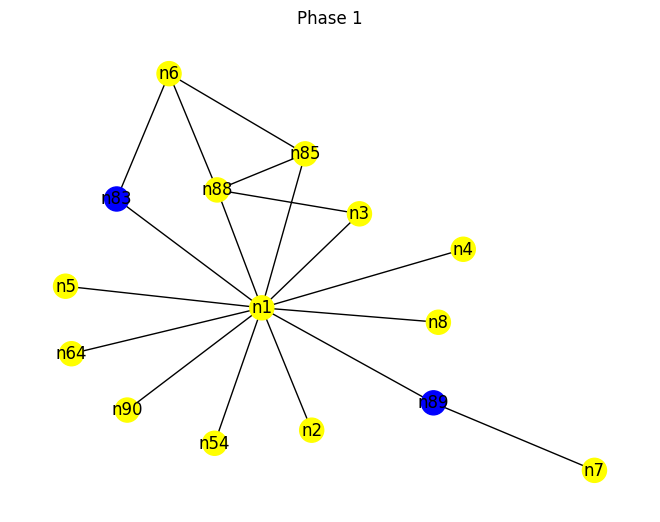

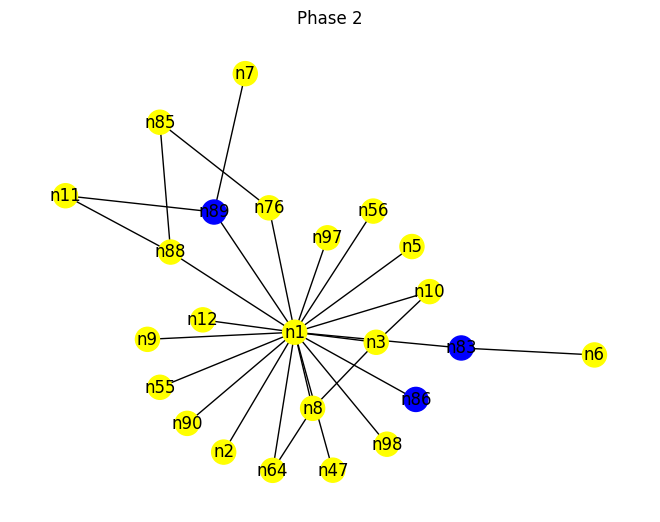

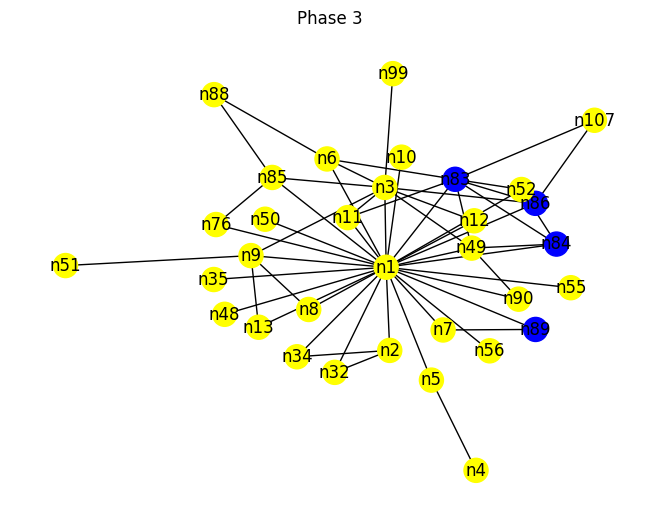

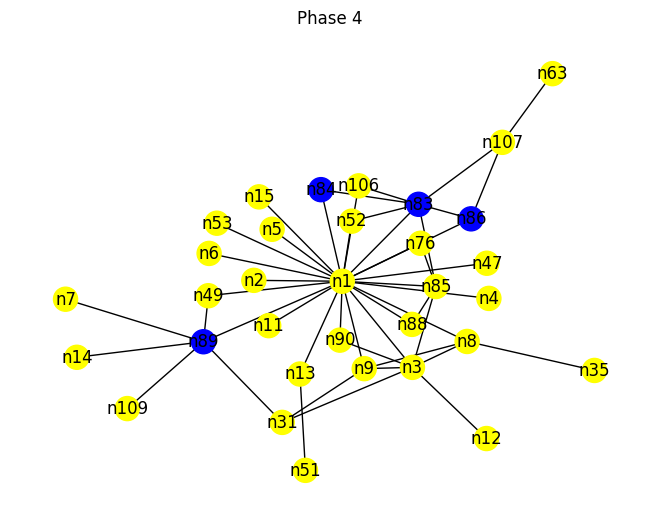

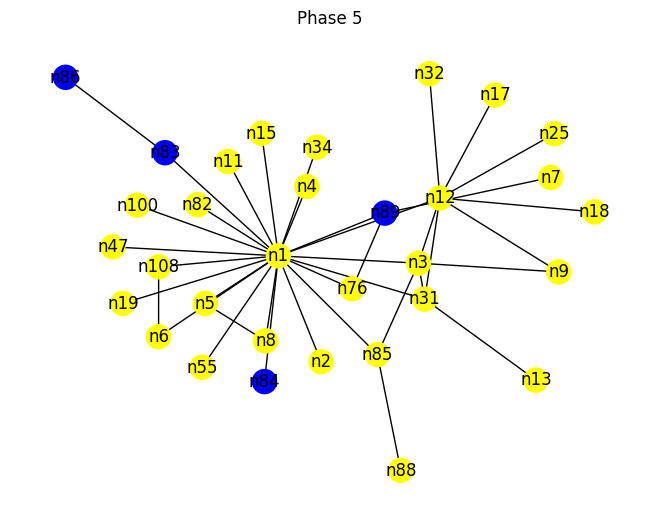

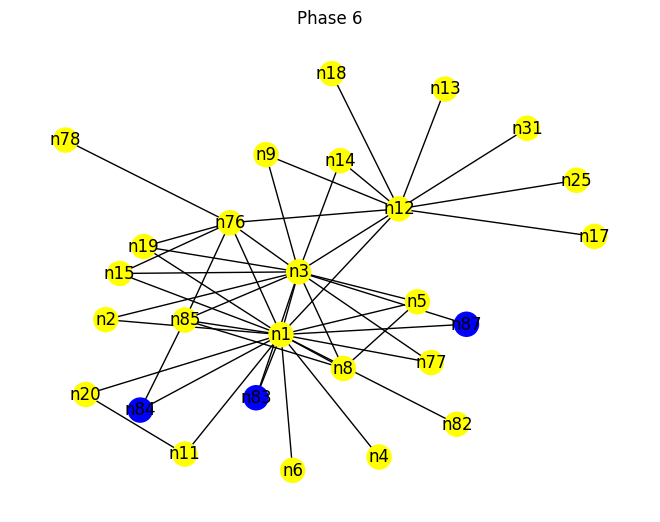

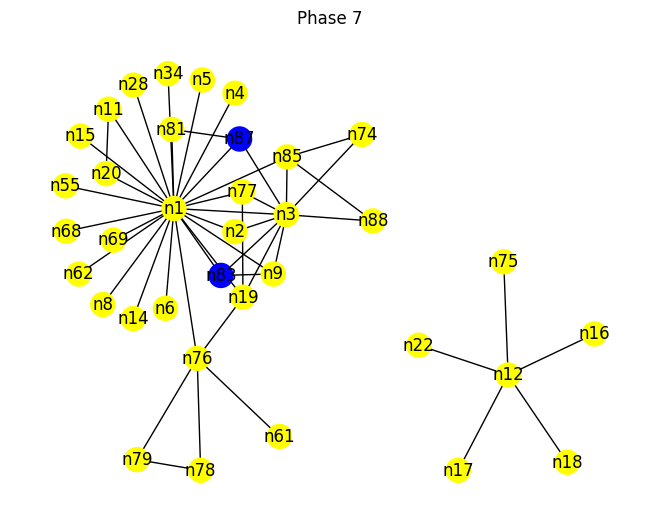

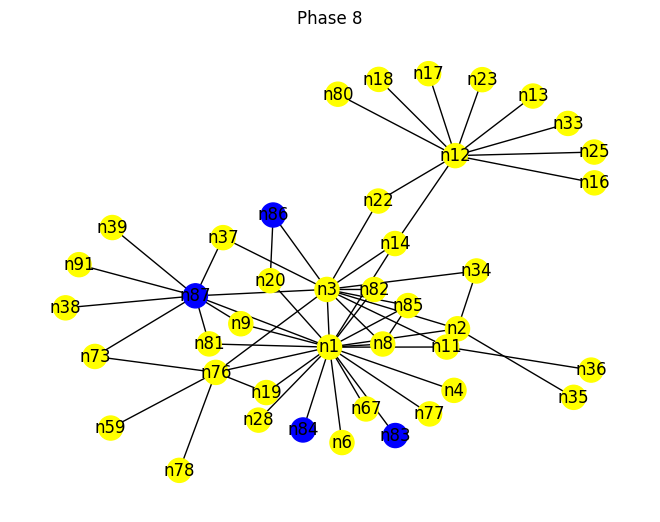

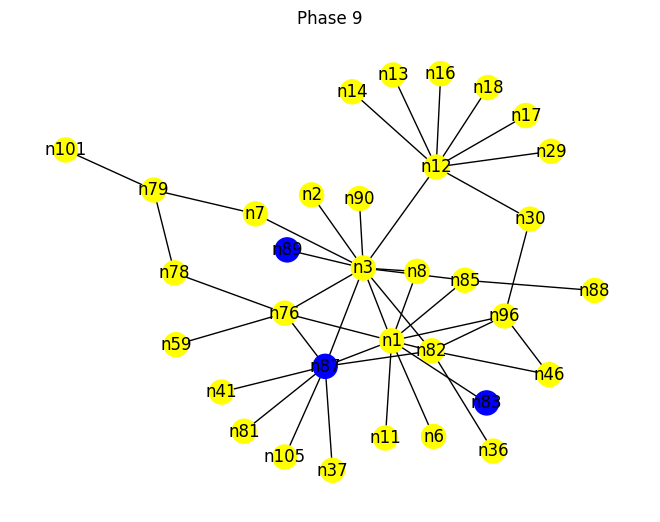

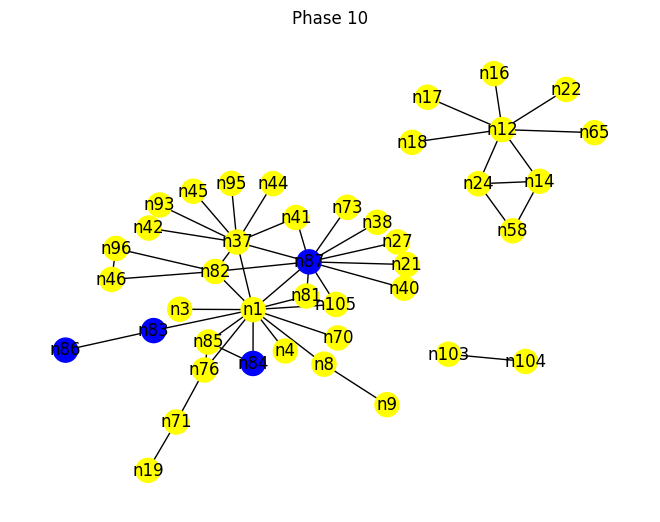

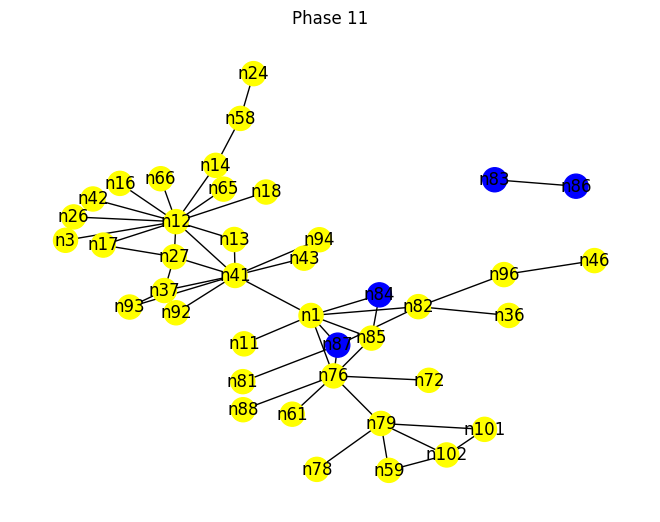

In [ ]:
for i in range(1, 12):
  color_map = []
  for node in G[i]:
    if node in investors:
        color_map.append('blue')
    else:
        color_map.append('yellow')


  nx.draw(G[i], pos=pos[i], node_color=color_map, with_labels=True)
  plt.title(f"Phase {i}")
  plt.show()


### Hubs and Authorities

I also looked at the role of the investors as both hubs and authorities in the network. From the centrality measure we can see that they are central to the network when we are looking at undirected graphs of their involvement. But I wondered what their relationship was when we are looking at the direction of contacts- are they calling important people, or are they the important people being called. I found that they are actually both, on average equally so, and at much higher levels than the average person in the network.


In [ ]:
def hits_plot(graph, group, title):
  hub_measure=dict.fromkeys(group,0)
  auth_measure=dict.fromkeys(group,0)

  for i in range(1,len(graph)+1):
    hubs, authorities = nx.hits(graph[i])

    for key in hubs:
      if key in group:
        hub_measure[key] = hub_measure[key] + hubs[key]

    for key in authorities:
      if key in group:
        auth_measure[key] = auth_measure[key] + authorities[key]


  for key in hub_measure:
    hub_measure[key] = hub_measure[key]/len(graph)
  print(sorted(hub_measure.items(), key=lambda x:x[1], reverse= True))

  for key in auth_measure:
    auth_measure[key] = auth_measure[key]/len(graph)
  print(sorted(auth_measure.items(), key=lambda x:x[1], reverse= True))


#plot average hub for each individual over the phases
  hub_names = list(hub_measure.keys())
  hub_values = list(hub_measure.values())

  plt.bar(range(len(hub_measure)), hub_values, tick_label=hub_names )

  plt.title(f"Average value of hub for each {title}")
  plt.text( 0, max(hub_values)*7/8 ,f'mean={round(mean(hub_values), 3)}, median={round(stats.median(hub_values), 3)}' , fontsize=11, bbox=dict(facecolor='white', alpha=1))
  plt.show()
  network_metric_statistics(hub_values)

  auth_names = list(auth_measure.keys())
  auth_values = list(auth_measure.values())

  plt.bar(range(len(auth_measure)), auth_values, tick_label=auth_names )

  plt.title(f"Average value of authority for each {title}")
  plt.text( 0, max(auth_values)*7/8 ,f'mean={round(mean(auth_values), 3)}, median={round(stats.median(auth_values), 3)}' , fontsize=11, bbox=dict(facecolor='white', alpha=1))
  plt.show()
  network_metric_statistics(auth_values)



[('n87', 0.055430189031657), ('n83', 0.029783496702146698), ('n84', 0.017660586293490068), ('n86', 0.012474707943397261), ('n89', 0.009041616454844898)]
[('n83', 0.03617424451263663), ('n87', 0.028818392997842834), ('n89', 0.027013443197198946), ('n84', 0.010813870749361609), ('n86', 0.0101575786923843)]


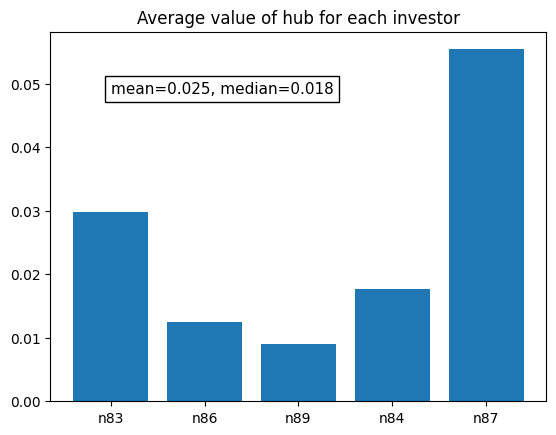

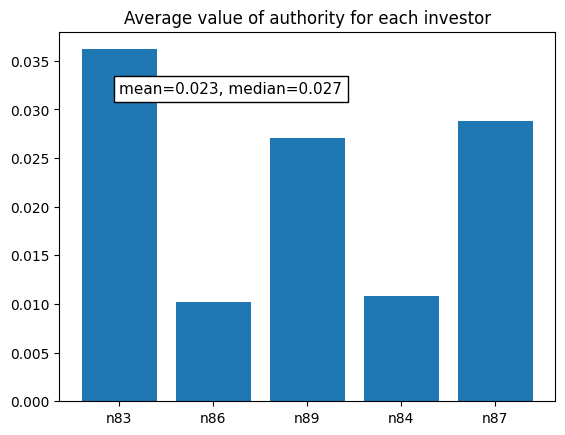

In [ ]:
hits_plot(dG, investors, "investor")

[('n1', 0.30881361773404237), ('n3', 0.10114836019110494), ('n85', 0.05595016805414726), ('n76', 0.04602042628749188), ('n12', 0.02659679858505123), ('n88', 0.024622541176041738), ('n6', 0.02230434060949539), ('n82', 0.022252885239065125), ('n2', 0.018157554229195138), ('n8', 0.01753942768109447), ('n11', 0.017460642064180933), ('n37', 0.01682573761679773), ('n19', 0.011809819469013872), ('n7', 0.010739847162860174), ('n77', 0.009202872573602616), ('n41', 0.008778610657843782), ('n15', 0.008489046717226681), ('n46', 0.008225662383624084), ('n49', 0.007779407624344203), ('n78', 0.007715896111064588), ('n14', 0.0073618115883242385), ('n18', 0.007046749255734331), ('n17', 0.007046749255734331), ('n5', 0.0070122556197211965), ('n96', 0.0055233941104862), ('n20', 0.005315094479047432), ('n81', 0.004996539864131807), ('n9', 0.0043930410946269255), ('n34', 0.0035983516849997094), ('n108', 0.003493890782683019), ('n16', 0.0034344176144708994), ('n90', 0.003368731371285832), ('n4', 0.0032614249

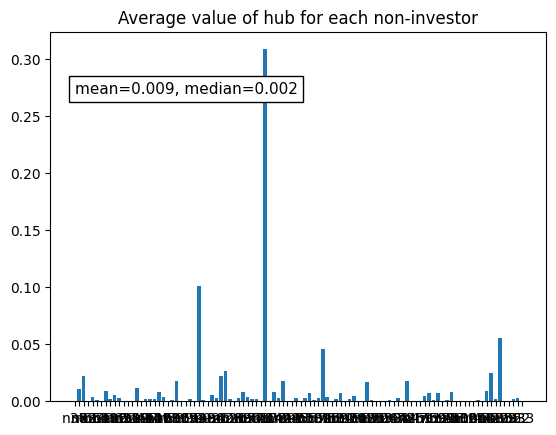

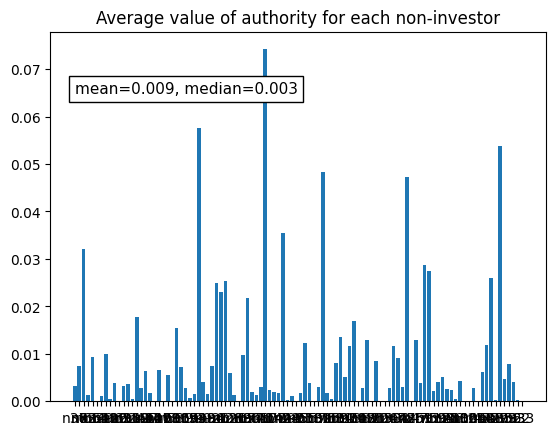

In [ ]:
hits_plot(dG, central_list, "non-investor")

Lets look at the diameter and connected components of the graphs and see how they change when you take out the investors.

In [ ]:
import numpy as np
diam = list()
diam = np.zeros(12)

for i in range(1,12):
  if nx.is_connected(G[i]):

    diam[i] = nx.diameter(G[i])

print("Diameter of each phase with investors included:", diam)

Diameter of each phase with investors included: [0. 4. 4. 4. 5. 4. 3. 0. 5. 5. 0. 0.]


In [ ]:
altered_G = G
for i in range(1,12):
  for n in investors:
    if n in G[i]:
      altered_G[i].remove_node(n)

What do these new graphs, without the investors look like?

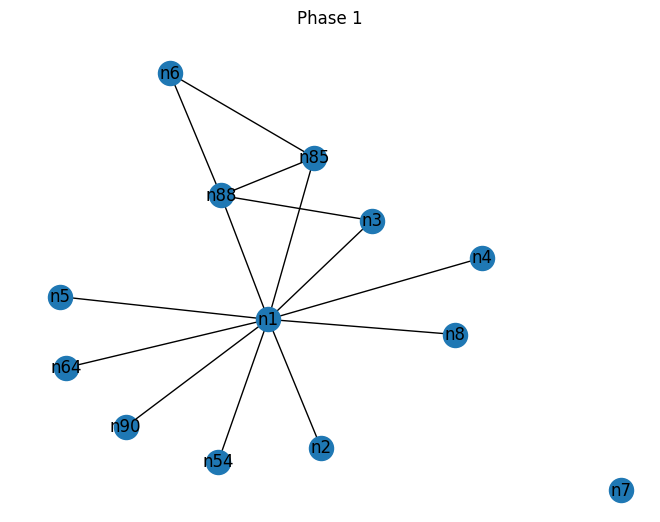

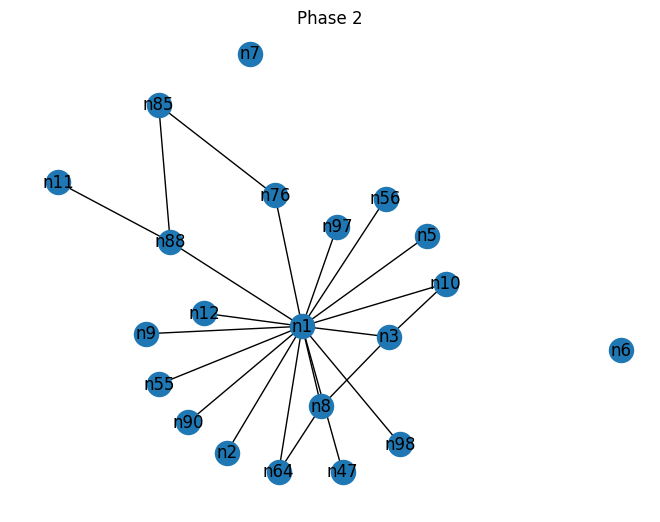

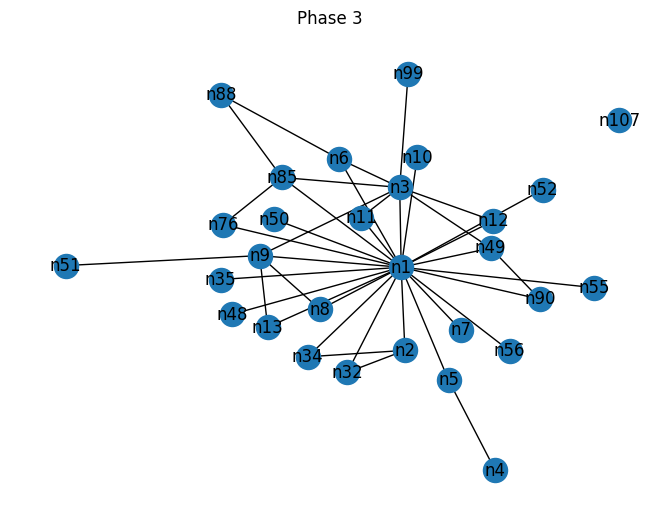

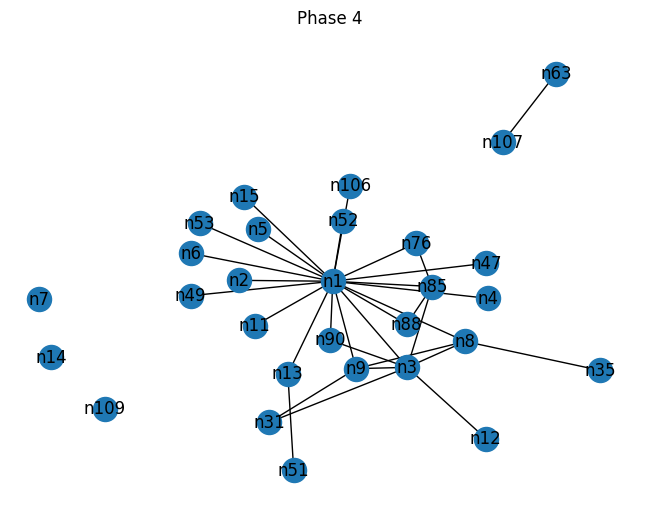

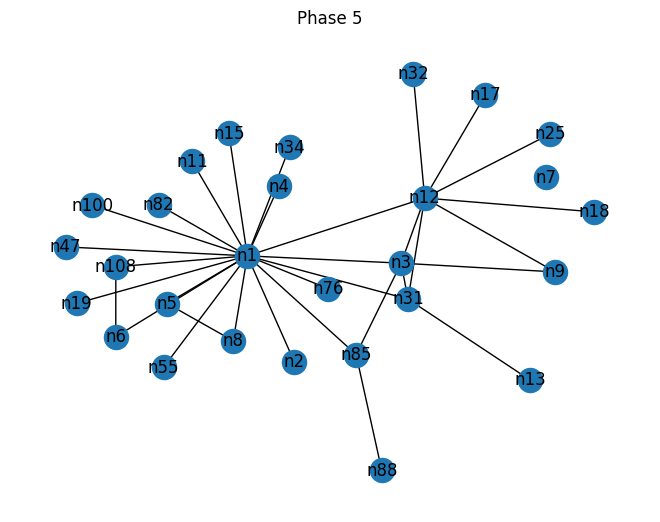

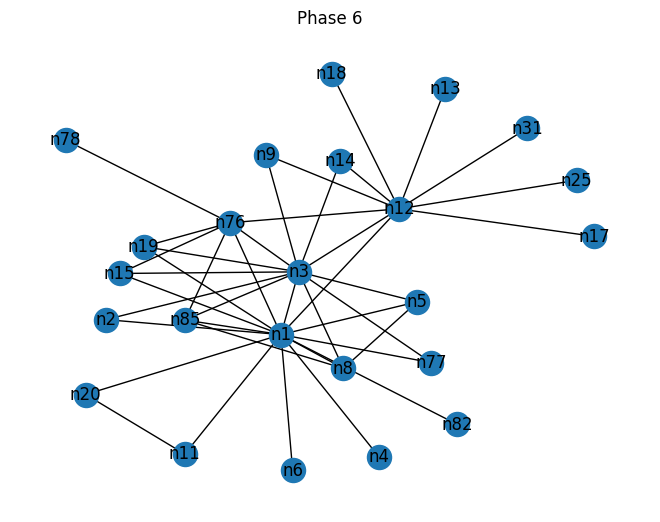

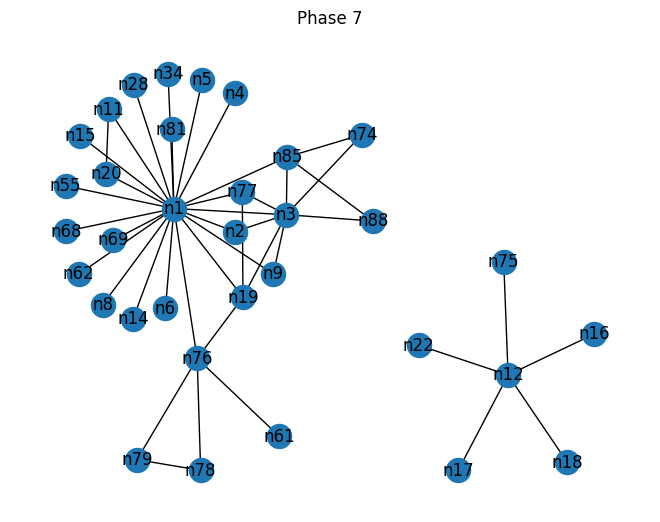

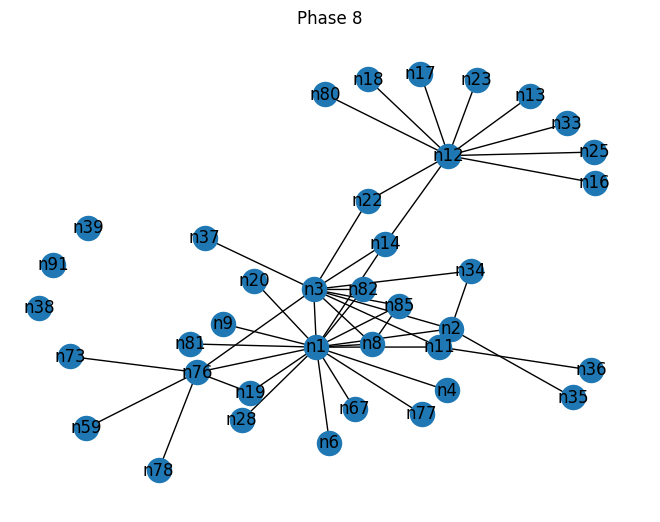

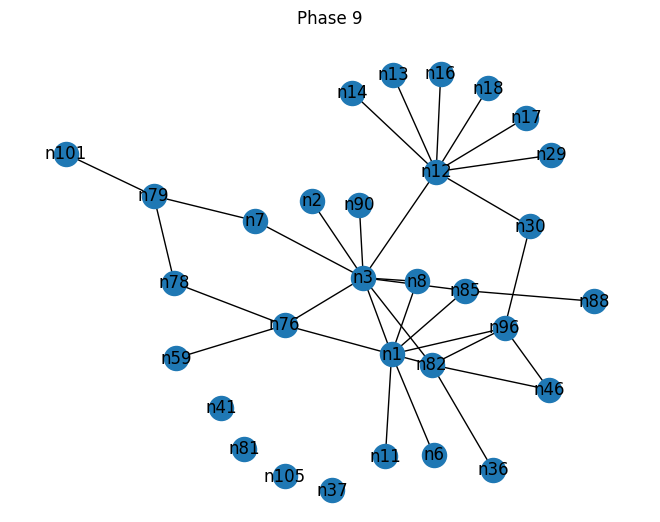

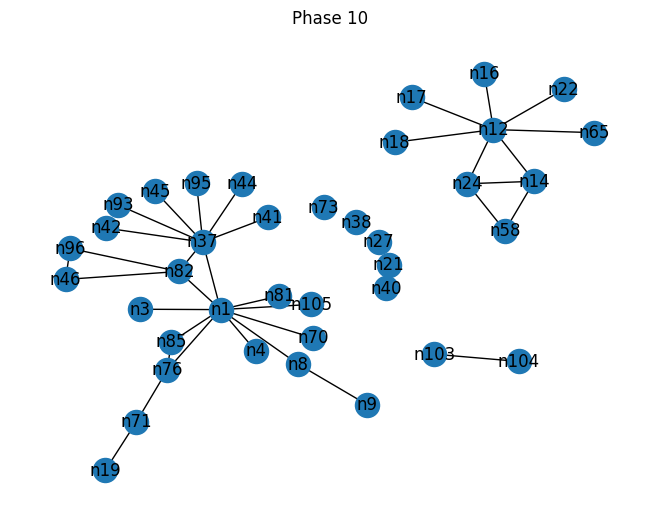

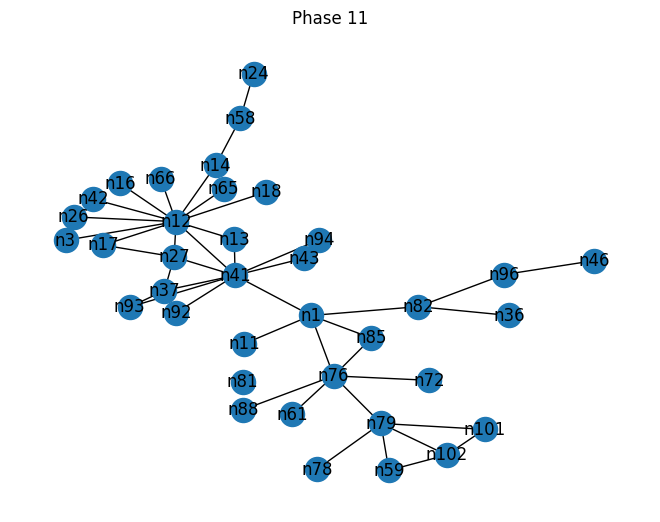

In [ ]:
for i in range(1, 12):



  nx.draw(G[i], pos=pos[i], with_labels=True)
  plt.title(f"Phase {i}")
  plt.show()

In [ ]:
diam = list()
diam = np.zeros(12)
print(diam)
for i in range(1,12):
  if nx.is_connected(altered_G[i]):

    diam[i] = nx.diameter(G[i])

print("Diameter of each phase if investors are taken out, (0 if unconnected)", diam)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Diameter of each phase if investors are taken out, (0 if unconnected) [0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0.]


We see that removing the small group of investor nodes makes every graph but one disconnected, meaning that the investors are critical bridges connecting these criminal networks.


Now lets break the graph into communities and see where the investors are within these.

What I noticed here is that investors are sometime the singular connection between disparate nodes of the network. Investors are always connected to the mastermind node, n1, but also may have separate communities that they are the only individual in connection with.

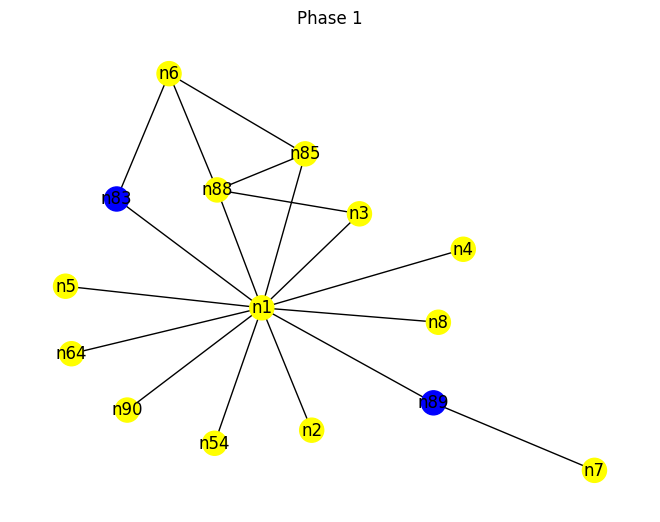

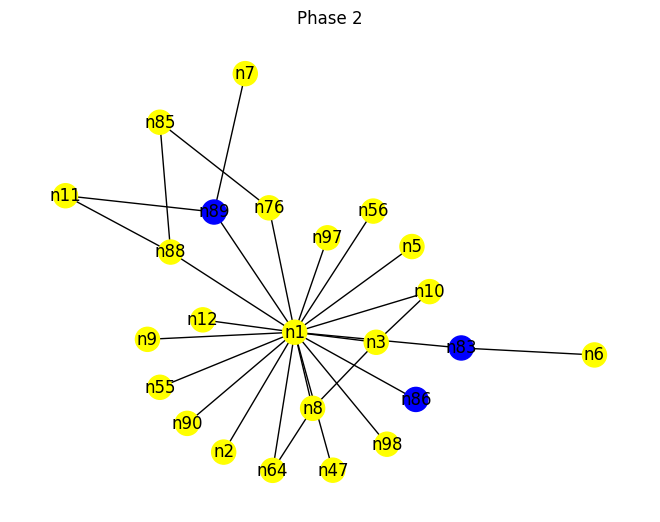

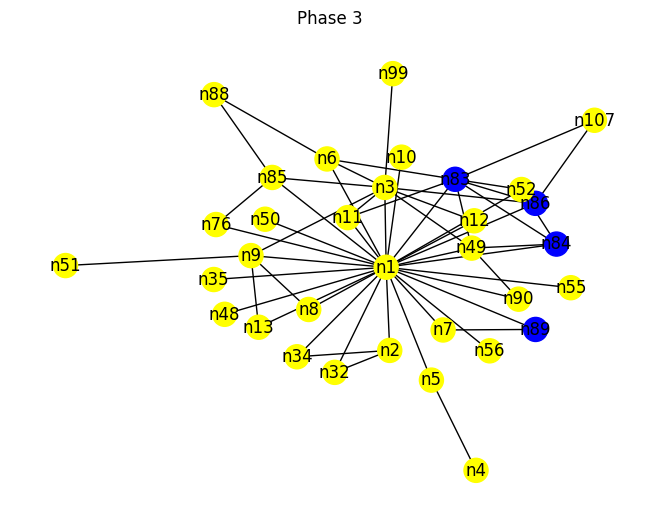

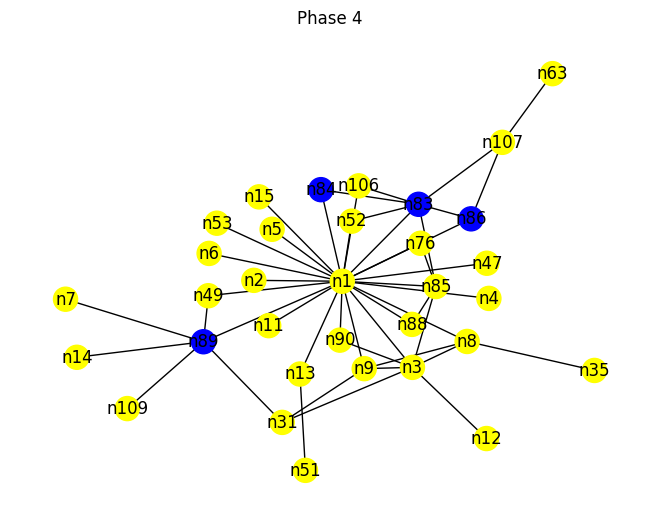

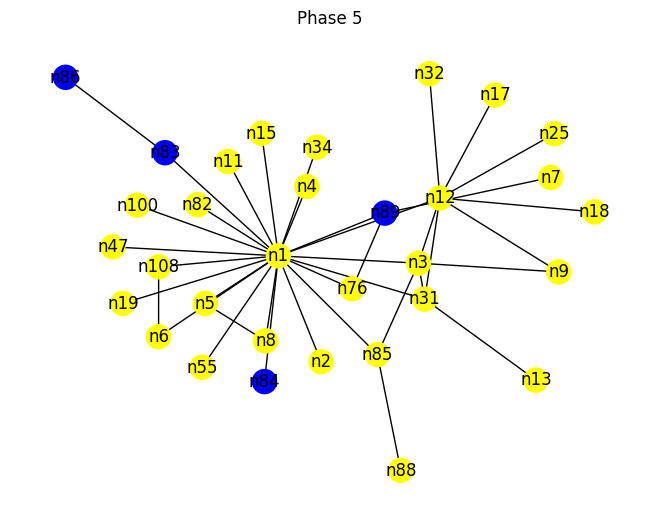

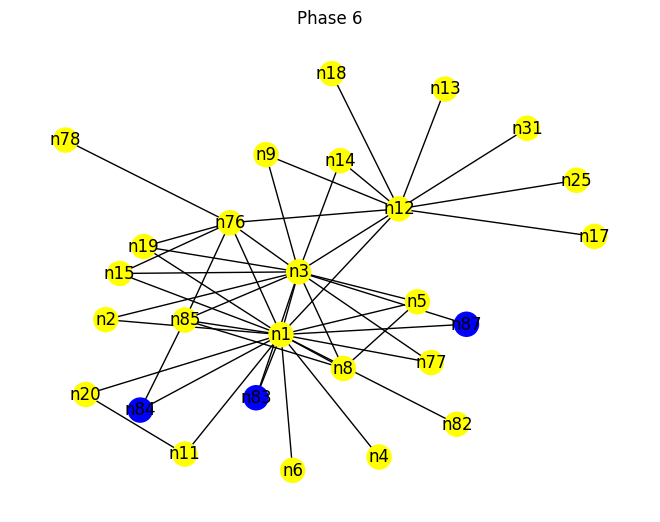

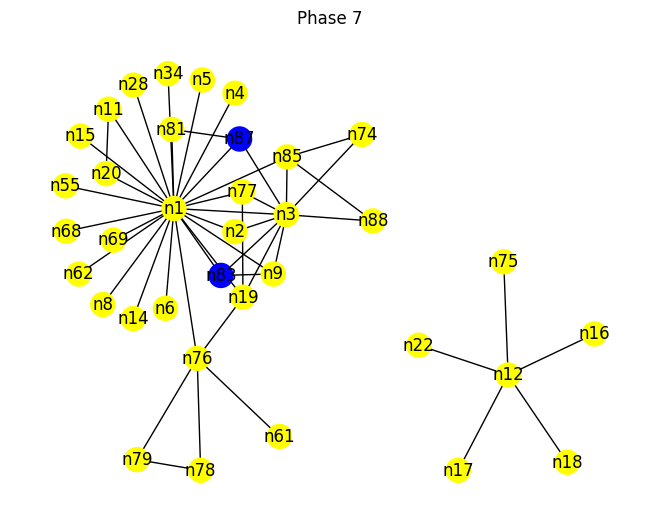

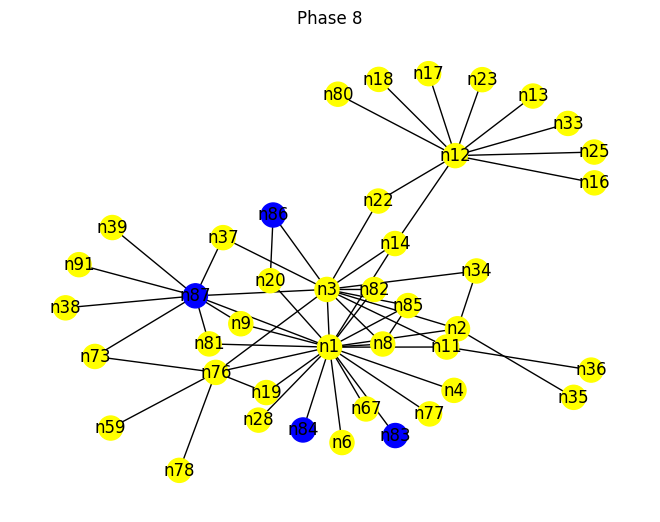

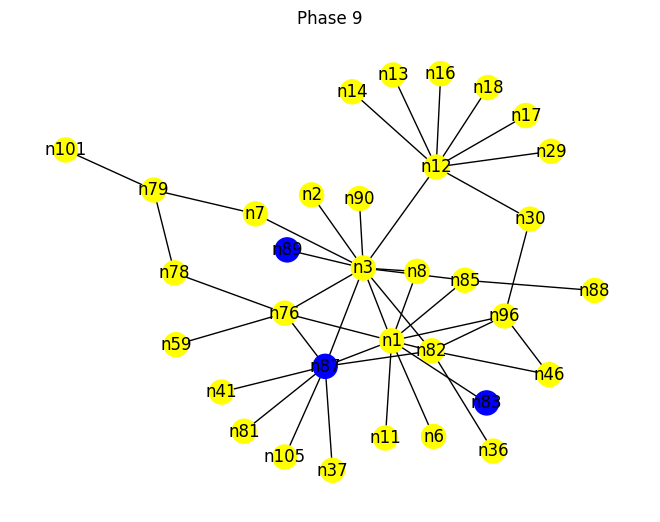

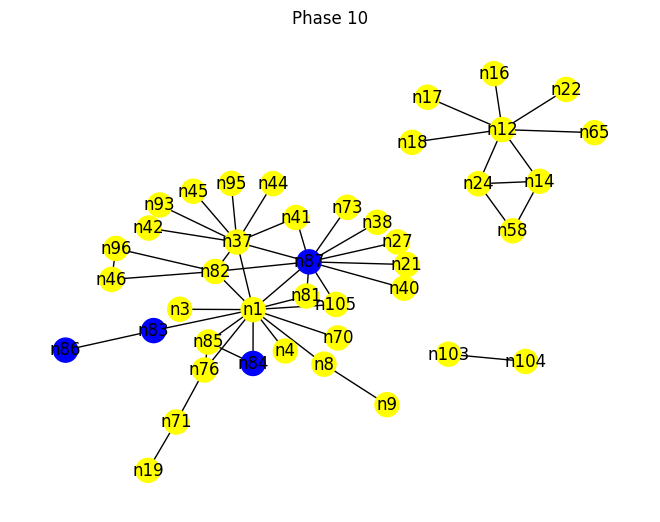

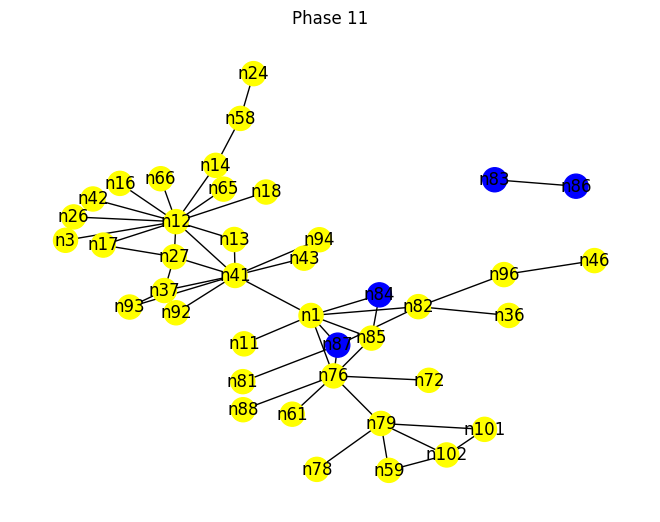

In [ ]:
for i in range(1, 12):
  color_map = []
  for node in G[i]:
    if node in investors:
        color_map.append('blue')
    else:
        color_map.append('yellow')


  nx.draw(G[i], pos=pos[i], node_color=color_map, with_labels=True)
  plt.title(f"Phase {i}")
  plt.show()

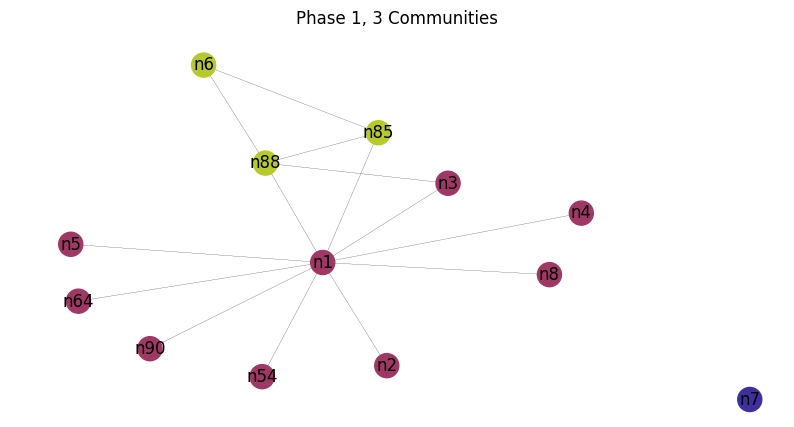

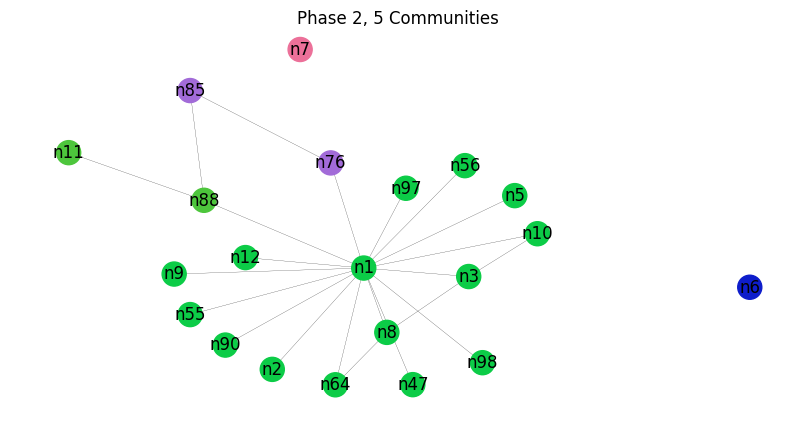

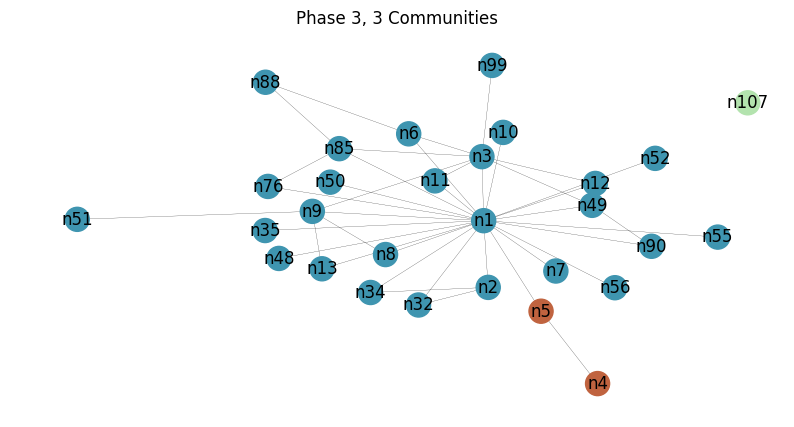

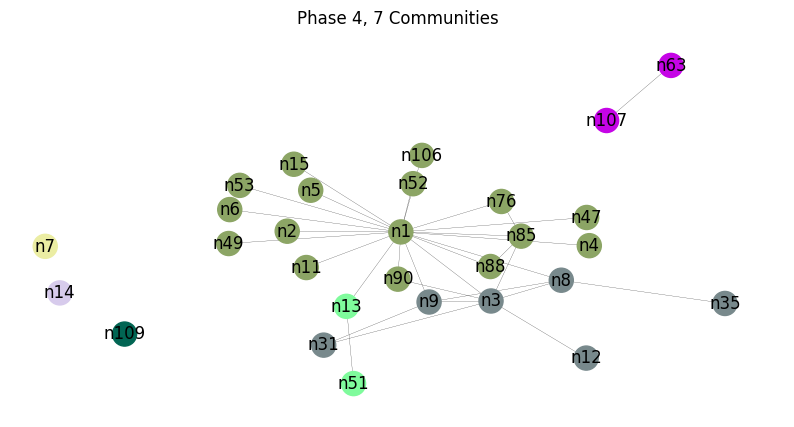

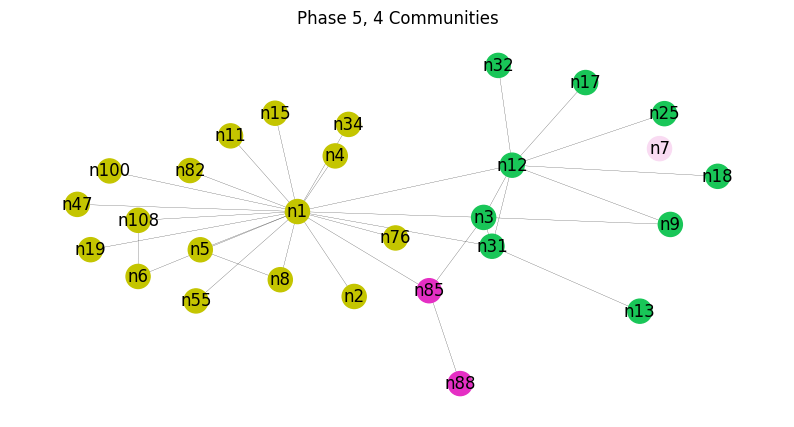

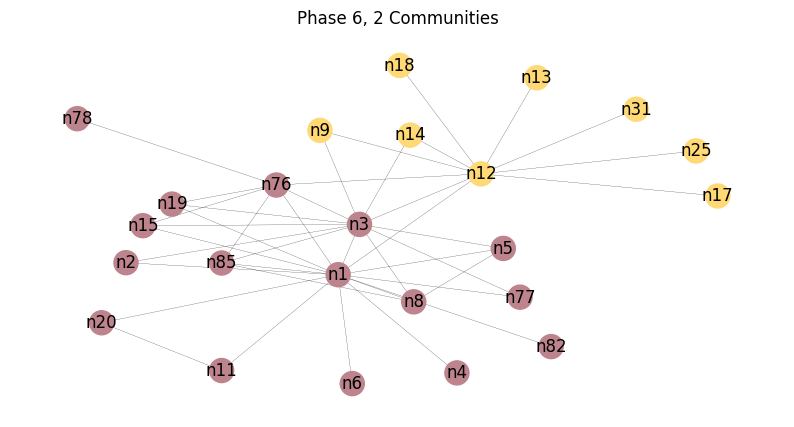

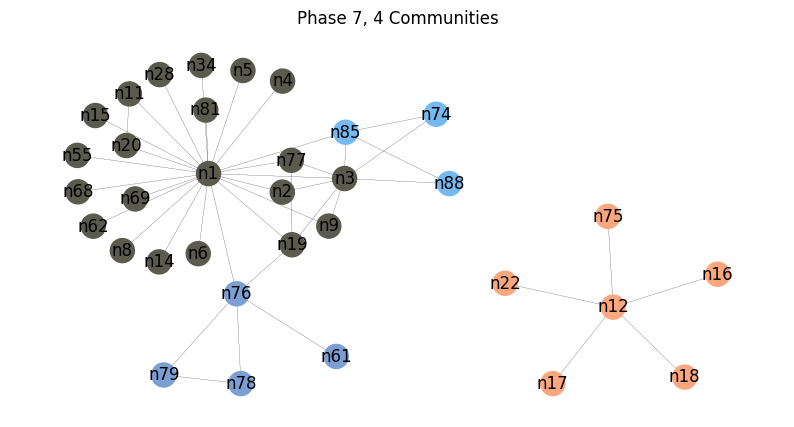

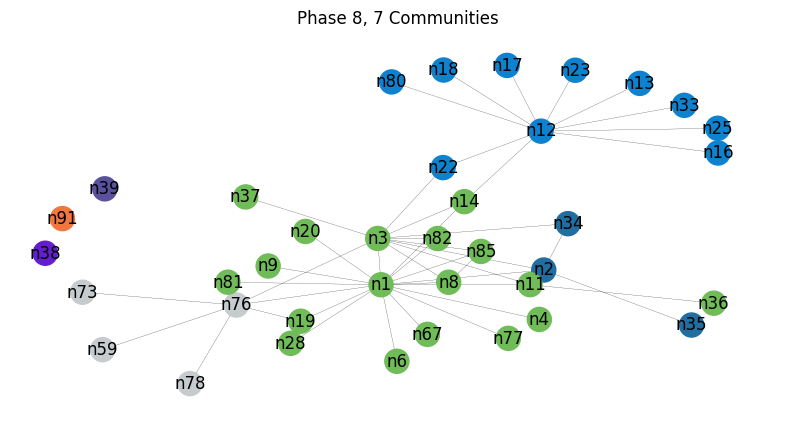

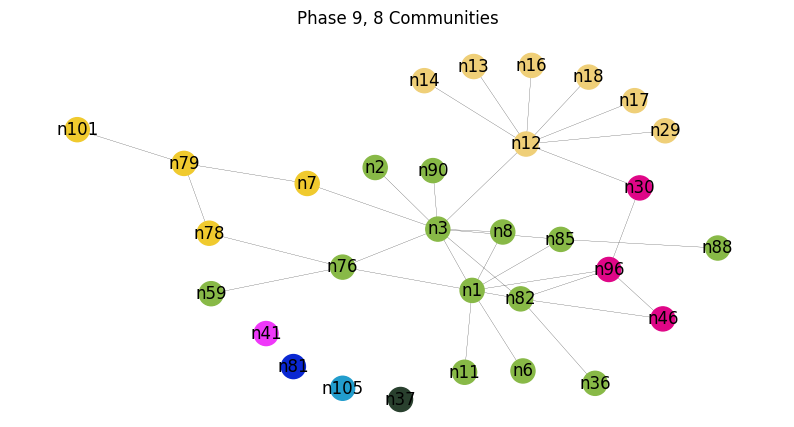

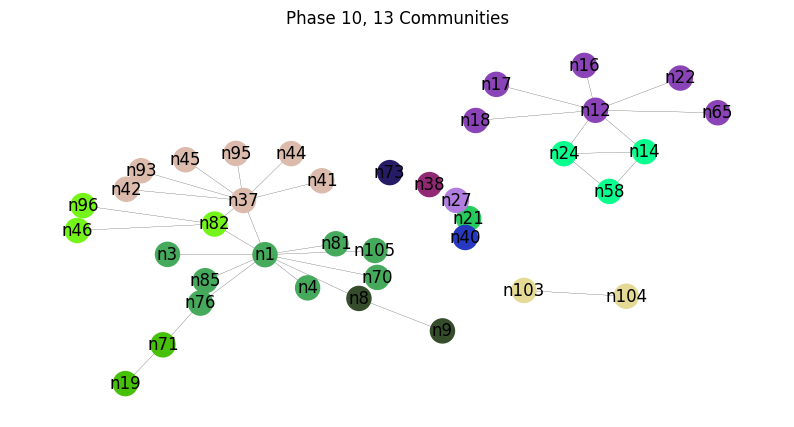

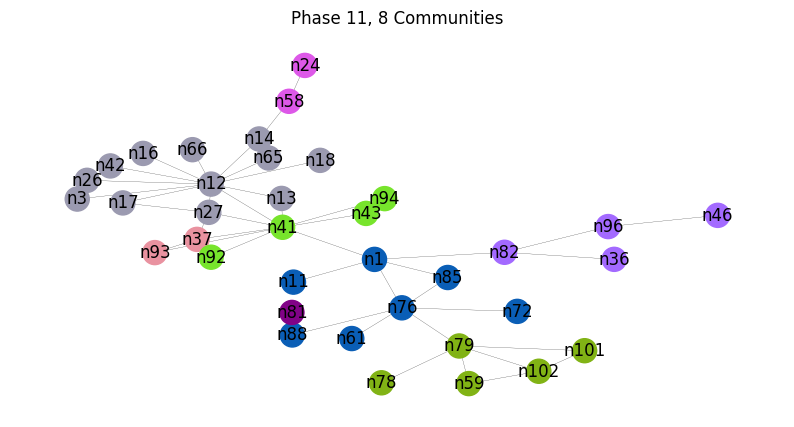

In [ ]:
from random import randint

colorlist = []
colors = central_dict.copy()
#colors = ["" for x in range(G[1].number_of_nodes())]  # initialize colors list
for i in range(1,12):
  counter = 0
  for com in nx.community.label_propagation_communities(G[i]):
      color = "#%06X" % randint(0, 0xFFFFFF)  # creates random RGB color
      counter += 1
      for node in list(com):  # fill colors list with the particular color for the community nodes
          colors[node] = color
  counter
  colorlist.clear()
  for sel_node in G[i].nodes:
    colorlist.append(colors[sel_node])
  plt.figure(figsize=(10, 5))
  plt.axis("off")
  plt.title(f"Phase {i}, {counter} Communities")
  nx.draw_networkx(
      G[i], pos=pos[i], with_labels=True, node_color=colorlist)
  plt.show()


In [ ]:
phases = {}
G = {}
dG = {}
for i in range(1,12):
  var_name = "phase" + str(i)
  file_name = "https://raw.githubusercontent.com/ragini30/Networks-Homework/main/" + var_name + ".csv"
  phases[i] = pd.read_csv(file_name, index_col = ["players"])
  phases[i].columns = "n" + phases[i].columns
  phases[i].index = phases[i].columns
  phases[i][phases[i] > 0] = 1
  G[i] = nx.from_pandas_adjacency(phases[i])
  G[i].name = var_name
  dG[i] = nx.from_pandas_adjacency(phases[i], create_using = nx.DiGraph())
  dG[i].name = var_name


central_set = set()
central_set.clear()

for i in range(1,12):
  central_set = central_set.union(G[i].nodes)


central_list = list(central_set)
central_dict = dict.fromkeys(central_list, 0)




Now lets graph the network divided into communities and visually see how our investors are spread throughout these. The investor nodes are in yellow.

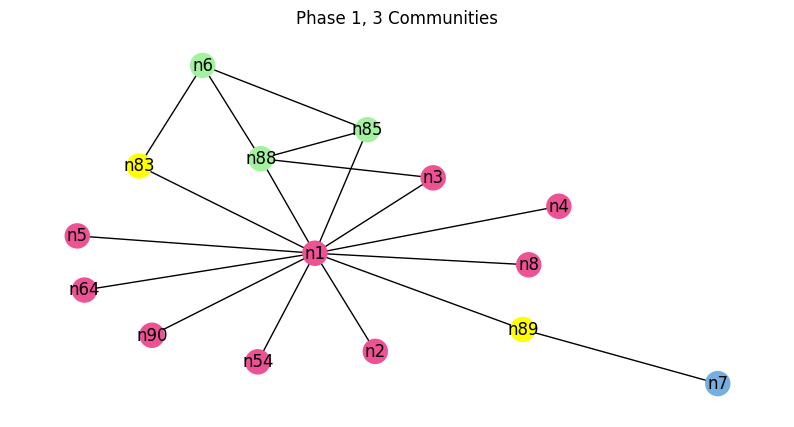

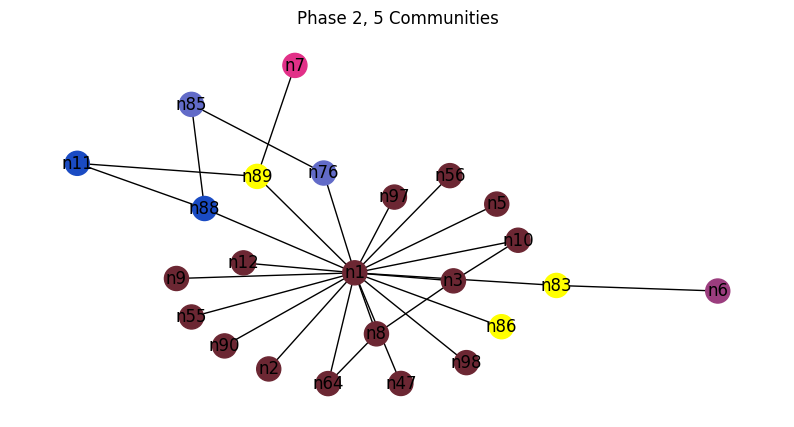

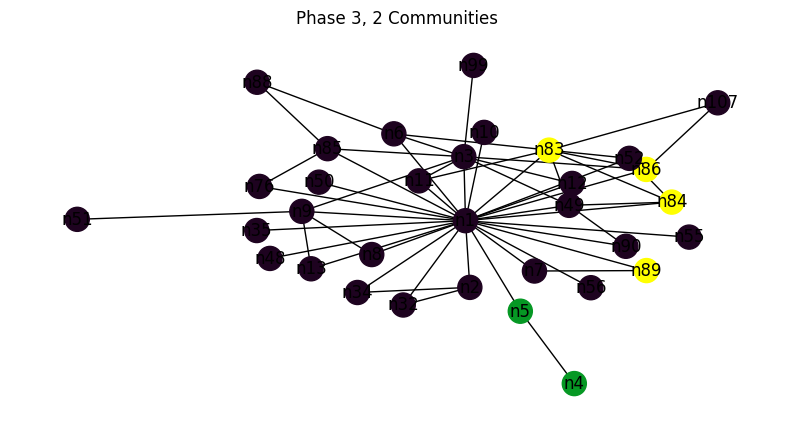

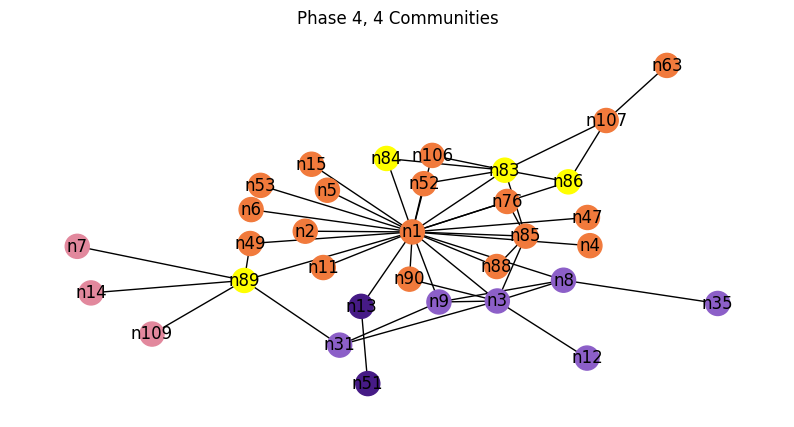

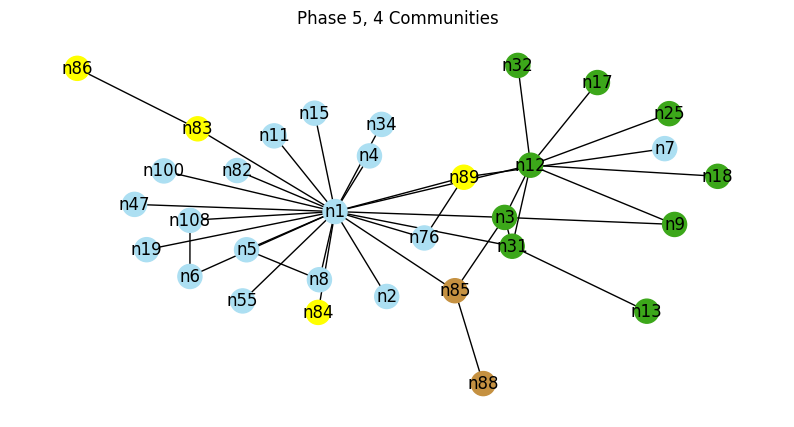

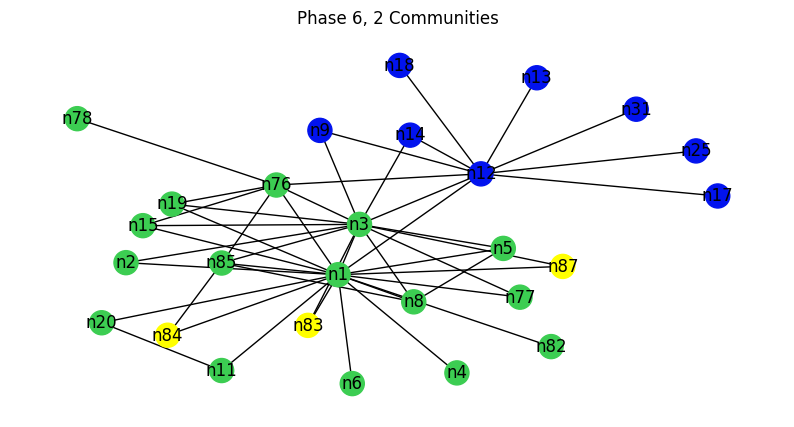

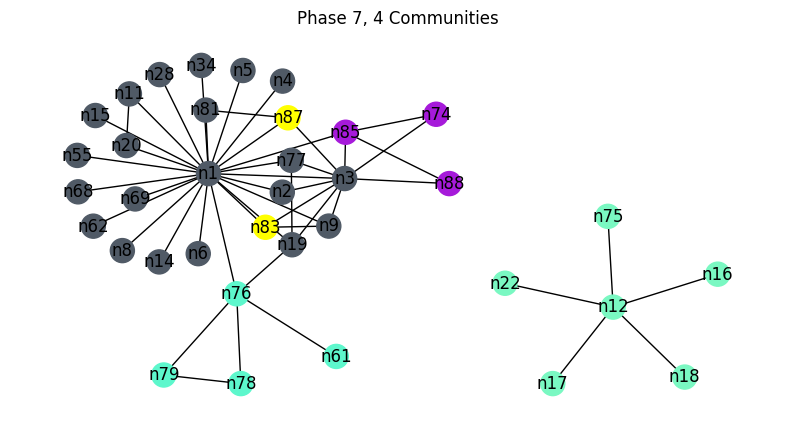

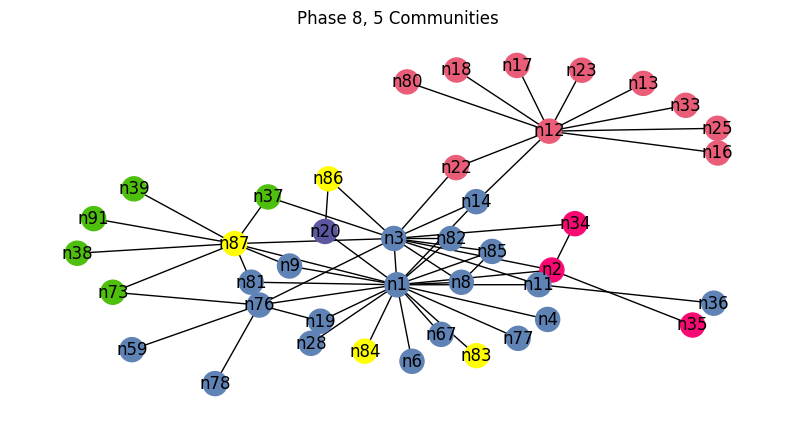

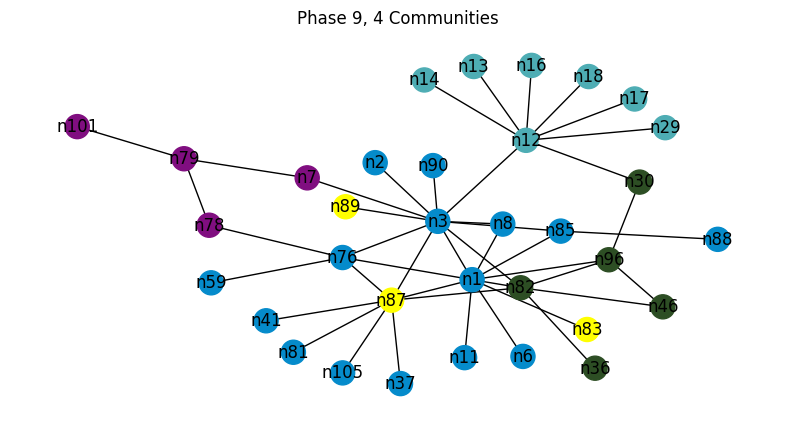

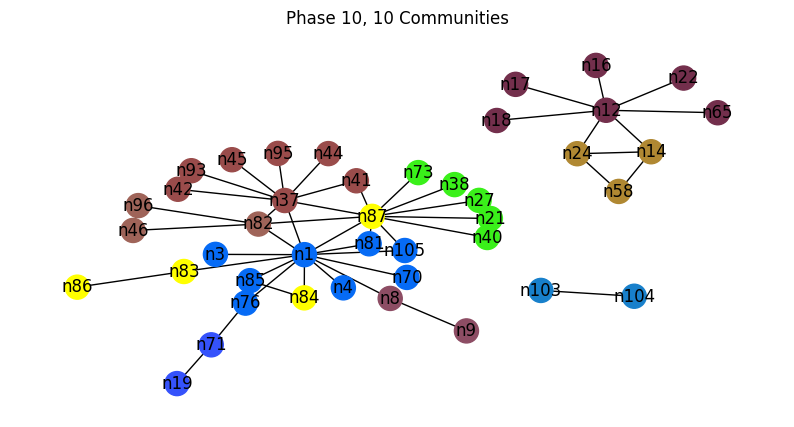

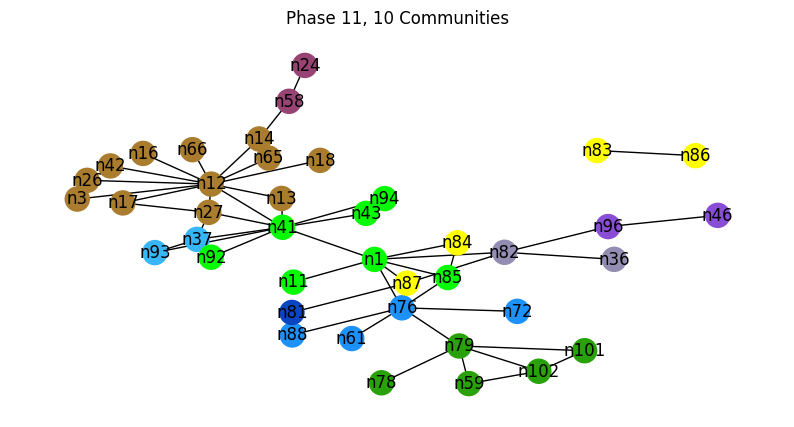

In [ ]:
colorlist = []
colors = central_dict.copy()
#colors = ["" for x in range(G[1].number_of_nodes())]  # initialize colors list
for i in range(1,12):
  counter = 0
  for com in nx.community.label_propagation_communities(G[i]):
      color = "#%06X" % randint(0, 0xFFFFFF)  # creates random RGB color
      counter += 1
      for node in list(com):  # fill colors list with the particular color for the community nodes
          colors[node] = color
  counter
  for investor in investors:
    if investor in G[i].nodes:
      colors[investor] = 'yellow'

  colorlist.clear()
  for sel_node in G[i].nodes:
    colorlist.append(colors[sel_node])
  plt.figure(figsize=(10, 5))
  plt.axis("off")
  plt.title(f"Phase {i}, {counter} Communities")
  nx.draw_networkx(
      G[i], pos=pos[i], with_labels=True, node_color=colorlist)
  plt.show()


The fact that investors are always connected to the mastermind gives yet another reason that monitoring their activity could lead to better modeling of criminal networks as well as because they are likely involved in multiple networks to minimize risk they may lead to the discovery of other criminal networks.

From my analysis above follows recommendations for heavier enforcement and stricter penalties for those few individuals involved in the investments in criminal rings.  These actors are in fact not only providing the fuel to keep these networks active, they are central players. Instead of continually prosecuting and punishing poorly connected easily replaceable street level actors, I advise law enforcement to pool their resources to target the criminal investors.

Unfortunately,  these individuals are harder to charge and prosecute because of the money and power that they hold. Additionally in many locals where drug trafficking is endemic the investors are often individuals within government and in fact are policy makers.
